<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [2]:
df_train = pd.read_csv("data/randomly_generated/train.csv")
df_test = pd.read_csv("data/randomly_generated/test.csv")

In [3]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

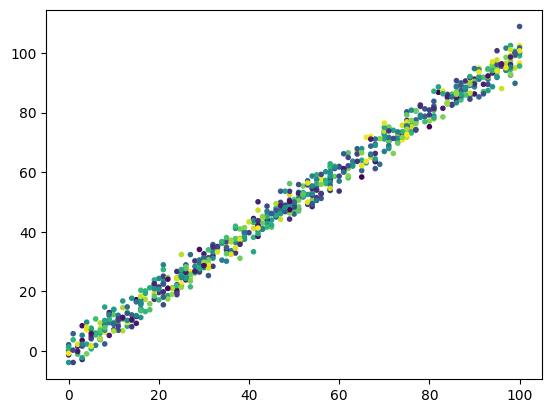

In [5]:
colors = np.random.uniform(15, 80, len(df_train["x"]))
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], c=colors, marker='.')

<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [6]:
# Transform features and target into numpy
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X = np.concatenate((i_term, X), axis=1)
# Initialize weights with 0
w = np.zeros((X.shape[1], 1))
# Weights history
weights_history = []
loss_history = []

In [7]:
# Hypothesis function
def h_function(x):
    return (w.T @ x).item()

In [8]:
#
def error(i):
    return h_function(X[i]) - y[i]

In [9]:
# Cost function
def cost_function():
    return np.sum([error(i) ** 2 for i in range(len(X))]) / len(X)

In [10]:
"""
Gradient descent algorithm with 3 approach
 - Batch Gradient Descent (BGD)
 - Stochastic Gradient Descent (SGD)
 - Mini Batch Gradient Descent (MBGD)
"""
def gradient_descent(epsilon=0.001, n=100, type="BGD", alpha=0.0001):
    global w
    if type == "BGD":
        cost = cost_function()
        loss_history.append(cost)
        weights_history.append(w.copy())
        for _ in range(n):
            for j in range(len(w)):
                grad = np.sum([error(i) * X[i][j] for i in range(len(X))])
                w[j] = w[j] - alpha * (grad / len(X))
            weights_history.append(w.copy())
            new_cost = cost_function()
            loss_history.append(new_cost)
            difference = abs(new_cost - cost)
            if  difference < epsilon:
                print("Convergence!")
                break
            else:
                cost = new_cost
        print(f"Final weights : {w}")


In [11]:
gradient_descent()

Convergence!
Final weights : [[0.01490042]
 [0.99838285]]


<h3 align="center" style="color:#467BD8">VISUALIZATION</h3>


In [12]:
loss_history

[np.float64(3340.1248261786727),
 np.float64(1486.3131557997358),
 np.float64(663.8209322707921),
 np.float64(298.90066593238095),
 np.float64(136.99421350450925),
 np.float64(65.16016930887886),
 np.float64(33.28911293334385),
 np.float64(19.148684414805277),
 np.float64(12.874913723054627),
 np.float64(10.091391765666481),
 np.float64(8.856409904417136),
 np.float64(8.308478241865936),
 np.float64(8.06537425240861),
 np.float64(7.957514937233653),
 np.float64(7.909660387659359),
 np.float64(7.888428470724131),
 np.float64(7.879008345549386),
 np.float64(7.87482880638859),
 np.float64(7.872974373770617),
 np.float64(7.872151524355157)]

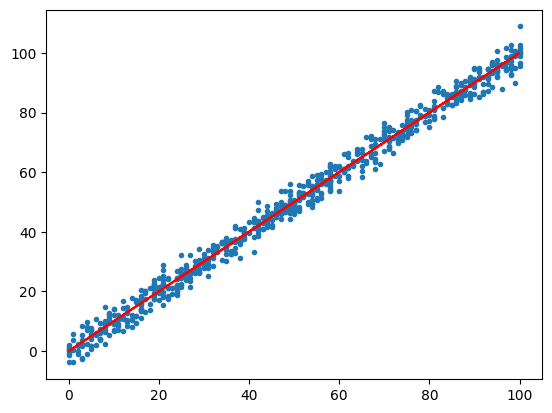

In [13]:
"""
# Plot the hypothesis function using the final weights over the training data
"""

image = np.array([h_function(x) for x in X])
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], marker='.')
ax.plot(image, image, color="red")

In [14]:
weights_history = np.array([w.flatten() for w in weights_history])
loss_history = np.array(loss_history, dtype=np.float64)

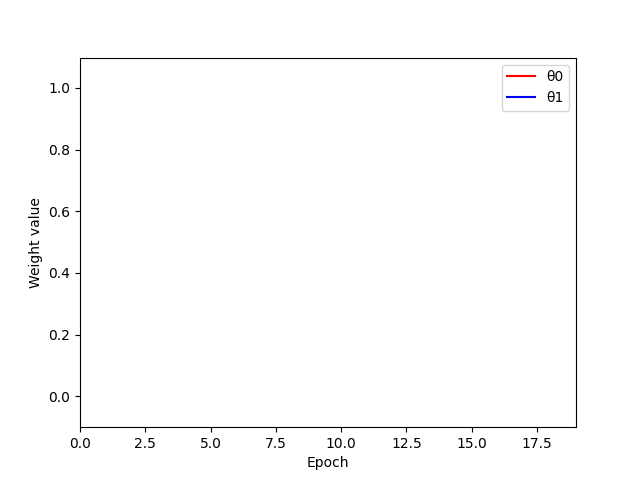

In [18]:
"""
# Plot weights evolution over time
"""

from matplotlib import animation
%matplotlib widget

fig, ax = plt.subplots()
ax.set_xlabel("Epoch")
ax.set_ylabel("Weight value")

epochs = len(weights_history)
n_frames_between_epochs = 10  # nombre de mini-frames entre chaque point
n_frames = (epochs-1) * n_frames_between_epochs + 1

# Interpolation linéaire des poids pour la fluidité
x_smooth = np.linspace(0, epochs-1, n_frames)
w0_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,0])
w1_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,1])

# Limites
ax.set_xlim(0, epochs-1)
ax.set_ylim(np.min(weights_history)-0.1, np.max(weights_history)+0.1)

# Points animés
line0, = ax.plot([], [], "r-", label="θ0")
line1, = ax.plot([], [], "b-", label="θ1")
ax.legend()

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return line0, line1

def update(frame):
    # Points jusqu'à la frame courante
    x_vals = np.linspace(0, frame/n_frames_between_epochs, frame+1)
    line0.set_data(x_vals, w0_smooth[:frame+1])
    line1.set_data(x_vals, w1_smooth[:frame+1])
    return line0, line1

ani = animation.FuncAnimation(
    fig, update, frames=n_frames,
    init_func=init, blit=True, interval=20, repeat=False
)

plt.show()


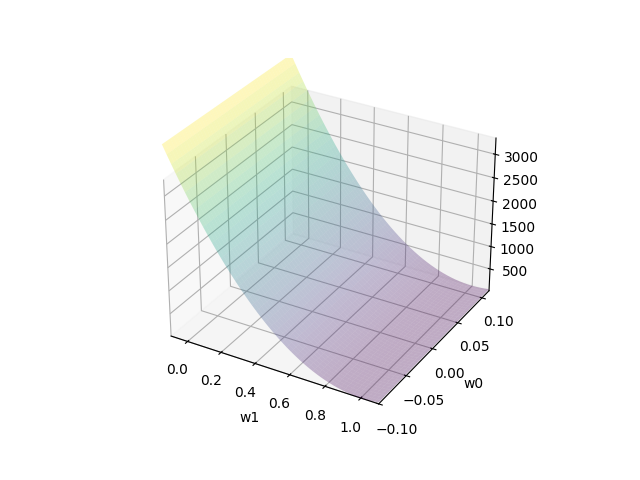

In [20]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

%matplotlib widget

epochs = len(weights_history)
n_frames_between_epochs = 60  # More frames for smoother animation
n_frames = (epochs-1) * n_frames_between_epochs + 1

# --- Interpolate weights and loss for smooth animation ---
x_smooth = np.linspace(0, epochs-1, n_frames)
w0_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,0])
w1_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,1])
loss_smooth = np.interp(x_smooth, np.arange(epochs), loss_history)

# --- 3D figure setup ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("w1")  # swapped axis
ax.set_ylabel("w0")  # swapped axis

# --- Set axis limits ---
ax.set_xlim(np.min(weights_history[:,1])-0.1, np.max(weights_history[:,1])+0.1)
ax.set_ylim(np.min(weights_history[:,0])-0.1, np.max(weights_history[:,0])+0.1)
ax.set_zlim(np.min(loss_history)-1, np.max(loss_history)+1)

# --- Create a surface (loss "landscape") ---
# Grid for w0 and w1
w0_grid = np.linspace(np.min(weights_history[:,0])-0.1, np.max(weights_history[:,0])+0.1, 50)
w1_grid = np.linspace(np.min(weights_history[:,1])-0.1, np.max(weights_history[:,1])+0.1, 50)
W1, W0 = np.meshgrid(w1_grid, w0_grid)  # swap axes to match plot

# Compute cost function on the grid
Z = np.array([[np.sum((X @ np.array([[w0],[w1]]) - y)**2)/len(y)
               for w0, w1 in zip(row_w0, row_w1)]
              for row_w0, row_w1 in zip(W0, W1)])

# Plot semi-transparent surface
ax.plot_surface(W1, W0, Z, alpha=0.3, cmap='viridis')

# --- Animated line showing weight progression ---
line, = ax.plot([], [], [], 'r-', lw=2)

def init():
    # Initialize empty line
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(frame):
    # Update line up to the current frame
    line.set_data(w1_smooth[:frame+1], w0_smooth[:frame+1])  # swapped axes
    line.set_3d_properties(loss_smooth[:frame+1])
    return line,

# --- Create animation ---
ani = animation.FuncAnimation(
    fig, update, frames=n_frames,
    init_func=init, blit=True, interval=20, repeat=False
)

plt.show()
